## <font size=5> <strong>Heart Disease Prediction

 

## I. Importing  libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.config', 'new_dataset.csv', '.ipynb_checkpoints', 'sample_data']


## II. Importing and analysing our dataset 

In [ ]:
dataset = pd.read_csv("new_dataset.csv")

In [ ]:
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset.shape

(810, 14)

#### Printing out a few columns

In [ ]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
652,49,1,3,118,149,0,2,126,0,0.8,1,3,3,1
443,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3,0
616,59,1,4,135,234,0,0,161,0,0.5,2,0,7,0
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1


#### Description

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000,876.000000
mean,54.386986,0.681507,1.647260,131.537671,247.310502,0.148402,0.680365,149.656393,0.327626,1.042808,1.456621,0.711187,3.047945,0.513699
std,9.080076,0.466158,1.432681,17.618748,51.750827,0.355701,0.741043,22.959482,0.469616,1.154897,0.620922,0.998244,1.621282,0.500098
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.750000,0.000000,0.000000,120.000000,211.750000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,3.000000,140.000000,275.250000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000,7.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 876 entries, 0 to 875
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       876 non-null    int64  
 1   sex       876 non-null    int64  
 2   cp        876 non-null    int64  
 3   trestbps  876 non-null    int64  
 4   chol      876 non-null    int64  
 5   fbs       876 non-null    int64  
 6   restecg   876 non-null    int64  
 7   thalach   876 non-null    int64  
 8   exang     876 non-null    int64  
 9   oldpeak   876 non-null    float64
 10  slope     876 non-null    int64  
 11  ca        876 non-null    int64  
 12  thal      876 non-null    int64  
 13  target    876 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 95.9 KB


#### Analysing columns:

In [ ]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


#### Analysing the 'target' variable

In [ ]:
dataset["target"].describe()

count    876.000000
mean       0.513699
std        0.500098
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [ ]:
dataset["target"].unique()

array([1, 0])

#### we can see ,this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [ ]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
slope       0.325794
cp          0.234053
exang       0.172419
oldpeak     0.171685
thalach     0.160413
ca          0.142014
restecg     0.113596
sex         0.101371
age         0.090389
trestbps    0.050450
thal        0.040066
chol        0.025512
fbs         0.024291
Name: target, dtype: float64


In [ ]:
#we can seee that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### Analysing the target variable:

1    450
0    426
Name: target, dtype: int64


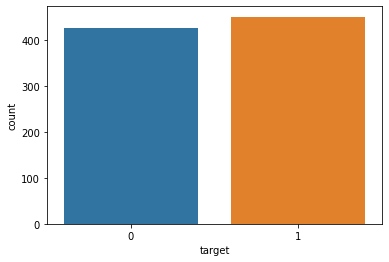

In [ ]:
y = dataset["target"]
sns.countplot(y)
target_temp = dataset.target.value_counts()
print(target_temp)

In [ ]:
print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/303,2)))


Percentage of patients without heart problems: 140.59
Percentage of patients with heart problems: 148.51


### We will analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [ ]:
dataset["sex"].unique()

array([1, 0])

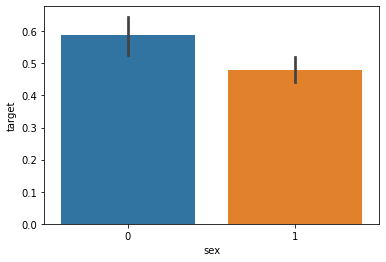

In [ ]:
sns.barplot(dataset["sex"],y)

##### We can notice that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [ ]:
dataset["cp"].unique()

array([3, 2, 1, 0, 4])

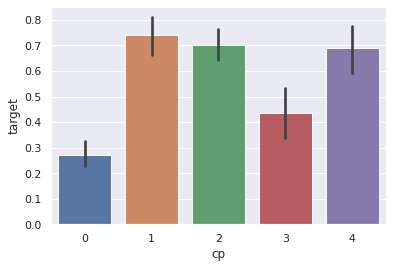

In [ ]:
sns.barplot(dataset["cp"],y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [ ]:
dataset["fbs"].describe()

count    876.000000
mean       0.148402
std        0.355701
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [ ]:
dataset["fbs"].unique()

array([1, 0])

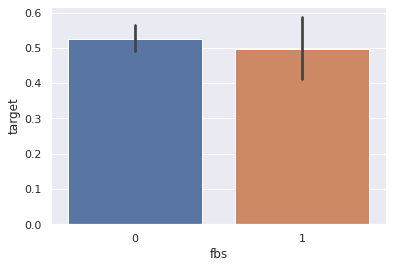

In [ ]:
sns.barplot(dataset["fbs"],y)

### Analysing the restecg feature

In [ ]:
dataset["restecg"].unique()

array([0, 1, 2])

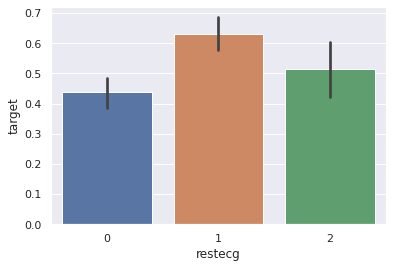

In [ ]:
sns.barplot(dataset["restecg"],y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [ ]:
dataset["exang"].unique()

array([0, 1])

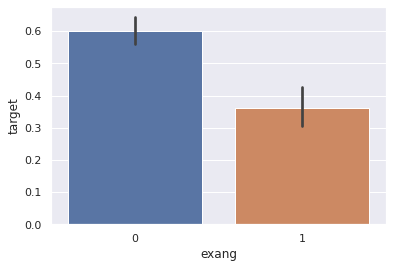

In [ ]:
sns.barplot(dataset["exang"],y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [ ]:
dataset["slope"].unique()

array([0, 2, 1, 3])

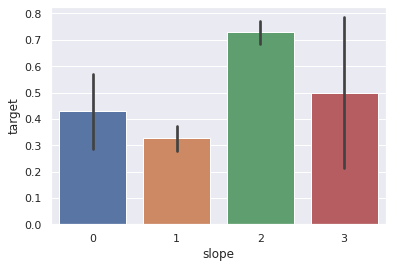

In [ ]:
sns.barplot(dataset["slope"],y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [ ]:
#number of major vessels (0-3) colored by flourosopy

In [ ]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4])

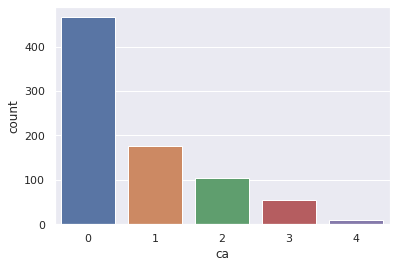

In [ ]:
sns.countplot(dataset["ca"])

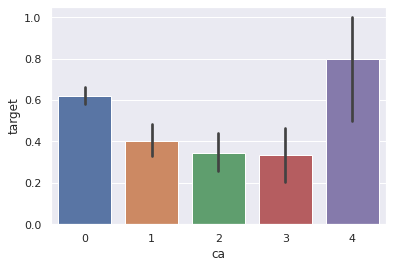

In [ ]:
sns.barplot(dataset["ca"],y)

##### ca=4 has astonishingly large number of heart patients

In [ ]:
### Analysing the 'thal' feature

In [ ]:
dataset["thal"].unique()

array([1, 2, 3, 0, 7, 6])

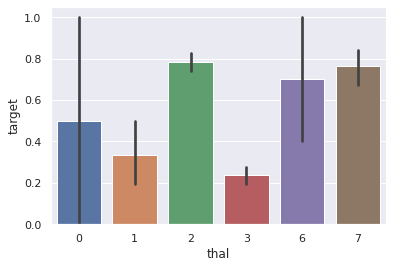

In [ ]:
sns.barplot(dataset["thal"],y)

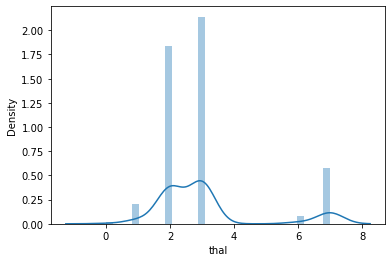

In [ ]:
sns.distplot(dataset["thal"])

## IV. Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=0)

In [ ]:
X_train.shape

(648, 13)

In [ ]:
X_test.shape

(162, 13)

In [ ]:
Y_train.shape

(700,)

In [ ]:
Y_test.shape

(176,)

## V. Model Fitting

In [ ]:
from sklearn.metrics import accuracy_score

### using Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression




lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)
precision=precision_score(Y_test,Y_pred_lr)
print("precision: ",precision)
recall=recall_score(Y_test,Y_pred_lr)
print("Recall : ",recall)
print("F score: ",(2*precision*recall)/(precision+recall))
confusionmat=confusion_matrix(Y_test,Y_pred_lr);
print("confusion matrix is : " ,confusionmat)


precision:  0.6224489795918368
Recall :  0.7011494252873564
F score:  0.6594594594594595
confusion matrix is :  [[52 37]
 [26 61]]


In [ ]:
Y_pred_lr.shape

(176,)

In [ ]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 64.2 %


The accuracy score achieved using Logistic Regression is: 85.25 %

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)
precision=precision_score(Y_test,Y_pred_nb)
print("precision: ",precision)
recall=recall_score(Y_test,Y_pred_nb)
print("Recall : ",recall)
print("F score: ",(2*precision*recall)/(precision+recall))
confusionmat=confusion_matrix(Y_test,Y_pred_nb);
print("confusion matrix is : " ,confusionmat)

precision:  0.6095238095238096
Recall :  0.735632183908046
F score:  0.6666666666666666
confusion matrix is :  [[48 41]
 [23 64]]


In [ ]:
Y_pred_nb.shape

(176,)

In [ ]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 63.64 %


The accuracy score achieved using Naive Bayes is: 85.25 %

### SVM

In [ ]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
sv.fit(X_train, Y_train)
Y_pred_svm = sv.predict(X_test)
precision=precision_score(Y_test,Y_pred_svm)
print("precision: ",precision)
recall=recall_score(Y_test,Y_pred_svm)
print("Recall : ",recall)
print("F score: ",(2*precision*recall)/(precision+recall))
confusionmat=confusion_matrix(Y_test,Y_pred_svm);
print("confusion matrix is : " ,confusionmat)

precision:  0.6951219512195121
Recall :  0.6551724137931034
F score:  0.6745562130177514
confusion matrix is :  [[64 25]
 [30 57]]


In [ ]:
Y_pred_svm.shape

(176,)

In [ ]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 68.75 %


The accuracy score achieved using Linear SVM is: 81.97 %

### K Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
precision=precision_score(Y_test,Y_pred_knn)
print("precision: ",precision)
recall=recall_score(Y_test,Y_pred_knn)
print("Recall : ",recall)
print("F score: ",(2*precision*recall)/(precision+recall))
confusionmat=confusion_matrix(Y_test,Y_pred_knn);
print("confusion matrix is : " ,confusionmat)

precision:  0.39325842696629215
Recall :  0.40229885057471265
F score:  0.39772727272727276
confusion matrix is :  [[35 54]
 [52 35]]


In [ ]:
Y_pred_knn.shape

(176,)

In [ ]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 39.77 %


The accuracy score achieved using KNN is: 67.21 %

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)
precision=precision_score(Y_test,Y_pred_dt)
print("precision: ",precision)
recall=recall_score(Y_test,Y_pred_dt)
print("Recall : ",recall)
print("F score: ",(2*precision*recall)/(precision+recall))
confusionmat=confusion_matrix(Y_test,Y_pred_dt);
print("confusion matrix is : " ,confusionmat)

precision:  0.826530612244898
Recall :  0.9310344827586207
F score:  0.8756756756756757
confusion matrix is :  [[72 17]
 [ 6 81]]


In [ ]:
print(Y_pred_dt.shape)

(176,)


In [ ]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 86.93 %


The accuracy score achieved using Decision Tree is: 81.97 %

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
precision=precision_score(Y_test,Y_pred_rf)
print("precision: ",precision)
recall=recall_score(Y_test,Y_pred_rf)
print("Recall : ",recall)
print("F score: ",(2*precision*recall)/(precision+recall))
confusionmat=confusion_matrix(Y_test,Y_pred_rf);
print("confusion matrix is : " ,confusionmat)

precision:  0.9204545454545454
Recall :  0.9310344827586207
F score:  0.9257142857142858
confusion matrix is :  [[82  7]
 [ 6 81]]


In [ ]:
Y_pred_rf.shape

(176,)

In [ ]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 92.61 %


The accuracy score achieved using Decision Tree is: 90.16 %

## XGBoost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)
precision=precision_score(Y_test,Y_pred_xgb)
print("precision: ",precision)
recall=recall_score(Y_test,Y_pred_xgb)
print("Recall : ",recall)
print("F score: ",(2*precision*recall)/(precision+recall))
confusionmat=confusion_matrix(Y_test,Y_pred_xgb);
print("confusion matrix is : " ,confusionmat)

precision:  0.8227848101265823
Recall :  0.7471264367816092
F score:  0.7831325301204819
confusion matrix is :  [[75 14]
 [22 65]]


In [ ]:
Y_pred_xgb.shape

(176,)

In [ ]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 79.55 %


The accuracy score achieved using XGBoost is: 85.25 %

### Neural Network

In [ ]:
from keras.models import Sequential
from keras.models import *
from keras.layers import Dense

In [ ]:

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(11,activation='relu',input_dim=13))
# model.add(Dropout(0.5))
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(11,activation='relu',input_dim=13))
# model.add(Dropout(0.5))
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(8,activation='relu',input_dim=13))


model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=500)

Epoch 1/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.7994
Epoch 2/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4726 - accuracy: 0.7793
Epoch 3/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.7917
Epoch 4/500
21/21 [==============================] - 0s 3ms/step - loss: 0.4462 - accuracy: 0.7963
Epoch 5/500
21/21 [==============================] - 0s 3ms/step - loss: 0.4592 - accuracy: 0.7809
Epoch 6/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4370 - accuracy: 0.7870
Epoch 7/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.7840
Epoch 8/500
21/21 [==============================] - 0s 3ms/step - loss: 0.4675 - accuracy: 0.7762
Epoch 9/500
21/21 [==============================] - 0s 3ms/step - loss: 0.4645 - accuracy: 0.7901
Epoch 10/500
21/21 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8102
Epoch 11/

In [ ]:
Y_pred_nn = model.predict(X_test)

In [ ]:
Y_pred_nn.shape

(162, 1)

In [ ]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [ ]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 69.75 %


## VI. Output final score

In [ ]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 64.2 %
The accuracy score achieved using Naive Bayes is: 63.64 %
The accuracy score achieved using Support Vector Machine is: 68.75 %
The accuracy score achieved using K-Nearest Neighbors is: 39.77 %
The accuracy score achieved using Decision Tree is: 86.93 %
The accuracy score achieved using Random Forest is: 92.61 %
The accuracy score achieved using XGBoost is: 79.55 %
The accuracy score achieved using Neural Network is: 72.16 %


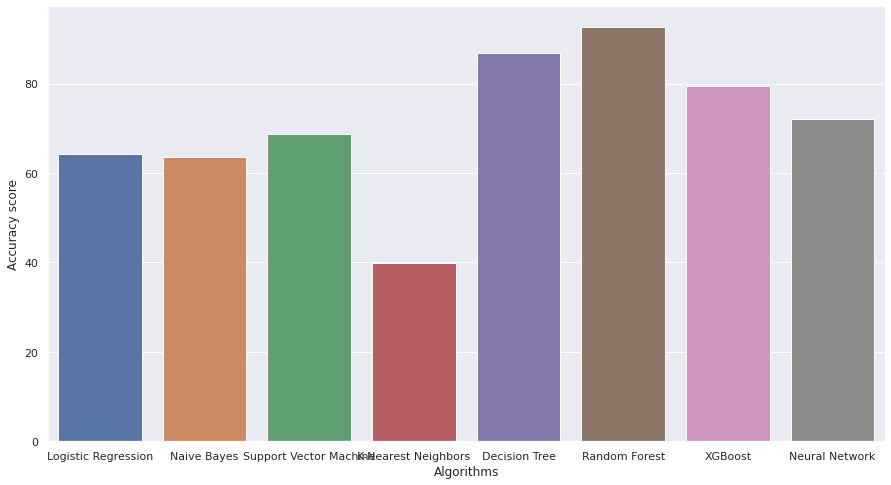

In [ ]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)